<a href="https://colab.research.google.com/github/erumenaezimano/Firewall/blob/main/Firewall_py_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FIREWALL SECURITY

In [ ]:
#load dataset
from google.colab import files
uploaded = files.upload()

Saving firewall.csv to firewall (2).csv


In [ ]:
import pandas as pd
import io

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None

 
df = pd.read_csv(io.BytesIO(uploaded['firewall.csv']))

DATA UNDERSTANDING

In [ ]:
df.shape

(65532, 12)

In [ ]:
df.head(5)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Columns: 12 entries, Source Port to Action
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [ ]:
df.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Source Port,65532.0,NaN,NaN,NaN,49391.97,15255.71,0.0,49183.0,53776.5,58638.0,65534.0
Destination Port,65532.0,NaN,NaN,NaN,10577.39,18466.03,0.0,80.0,445.0,15000.0,65535.0
NAT Source Port,65532.0,NaN,NaN,NaN,19282.97,21970.69,0.0,0.0,8820.5,38366.25,65535.0
NAT Destination Port,65532.0,NaN,NaN,NaN,2671.05,9739.16,0.0,0.0,53.0,443.0,65535.0
Bytes,65532.0,NaN,NaN,NaN,97123.95,5618438.91,60.0,66.0,168.0,752.25,1269359015.0
Bytes Sent,65532.0,NaN,NaN,NaN,22385.8,3828138.65,60.0,66.0,90.0,210.0,948477220.0
Bytes Received,65532.0,NaN,NaN,NaN,74738.15,2463207.71,0.0,0.0,79.0,449.0,320881795.0
Packets,65532.0,NaN,NaN,NaN,102.87,5133.0,1.0,1.0,2.0,6.0,1036116.0
Elapsed Time (sec),65532.0,NaN,NaN,NaN,65.83,302.46,0.0,0.0,15.0,30.0,10824.0
pkts_sent,65532.0,NaN,NaN,NaN,41.4,3218.87,1.0,1.0,1.0,3.0,747520.0


In [ ]:
#importing libaries for visualisation
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

PREPROCESSING

In [ ]:
#checking for missing value
total = df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(79)

,Total,Percent
Source Port,0,0.0
Destination Port,0,0.0
NAT Source Port,0,0.0
NAT Destination Port,0,0.0
Bytes,0,0.0
Bytes Sent,0,0.0
Bytes Received,0,0.0
Packets,0,0.0
Elapsed Time (sec),0,0.0
pkts_sent,0,0.0


In [ ]:
df.columns=df.columns.str.replace(' ','_')
df.rename(columns = {'Elapsed_Time_(sec)':'Elapsed_Time_sec'}, inplace = True)

In [ ]:
#investigation of categorical variables 
df.describe(exclude="number")

,Action
count,65532
unique,4
top,allow
freq,37640


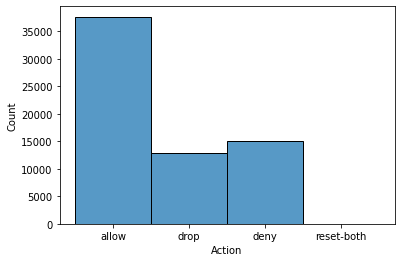

In [ ]:
sns.histplot(data=df,x=df['Action']);

In [ ]:
df.Action.value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

In [ ]:
#creating a binary class from a multiclass
df["Class"]="0"
label_cat={"Reject":["deny","drop","reset-both"],
            "Accept":["allow"]
         }

for label in label_cat:
  filter=df["Action"].str.contains('|'.join(label_cat[label]),case=False,regex=True,na=False)
  df.loc[filter, "Class"] = label

In [ ]:
df.Class.value_counts()

Accept    37640
Reject    27892
Name: Class, dtype: int64

In [ ]:
df=df.drop(['Action'], axis=1)

In [ ]:
#df.head()

DATA ANALYSIS

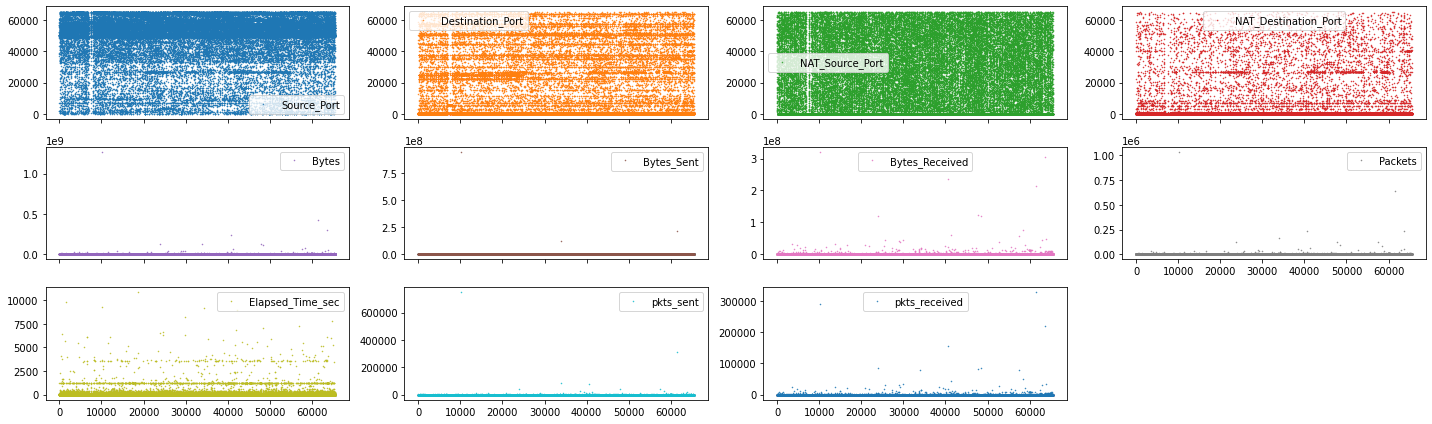

In [ ]:
#global view of numeric variables of the dataset
df.plot(lw=0,marker=".",subplots=True,layout=(3,4),figsize=(20,6),markersize=1)
plt.tight_layout();

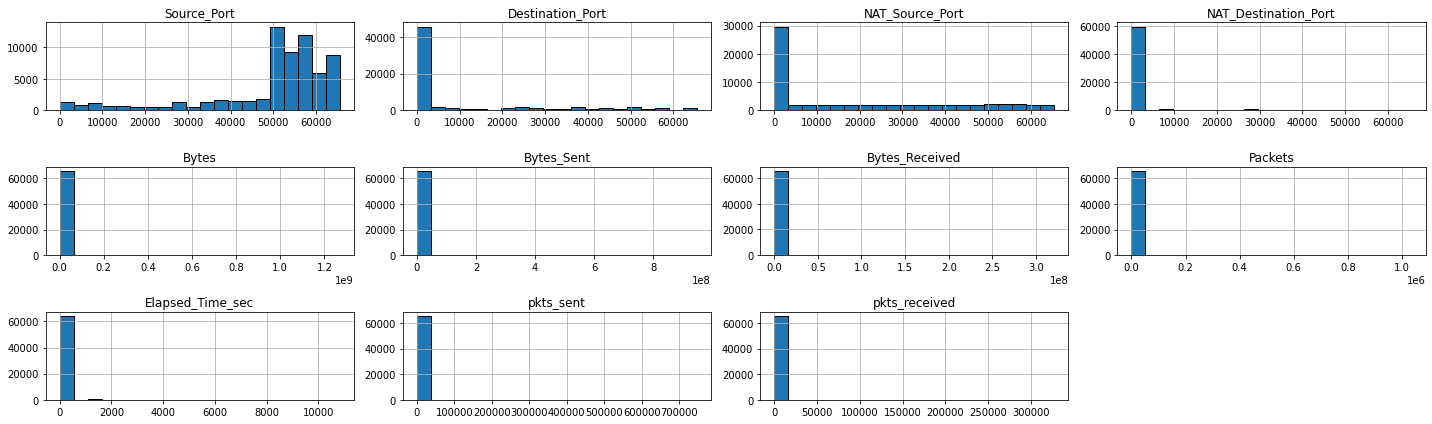

In [ ]:
#plot histogram to detect outliers
df.hist(bins=20, figsize=(20, 6), layout=(3,4), edgecolor="black")
plt.tight_layout();

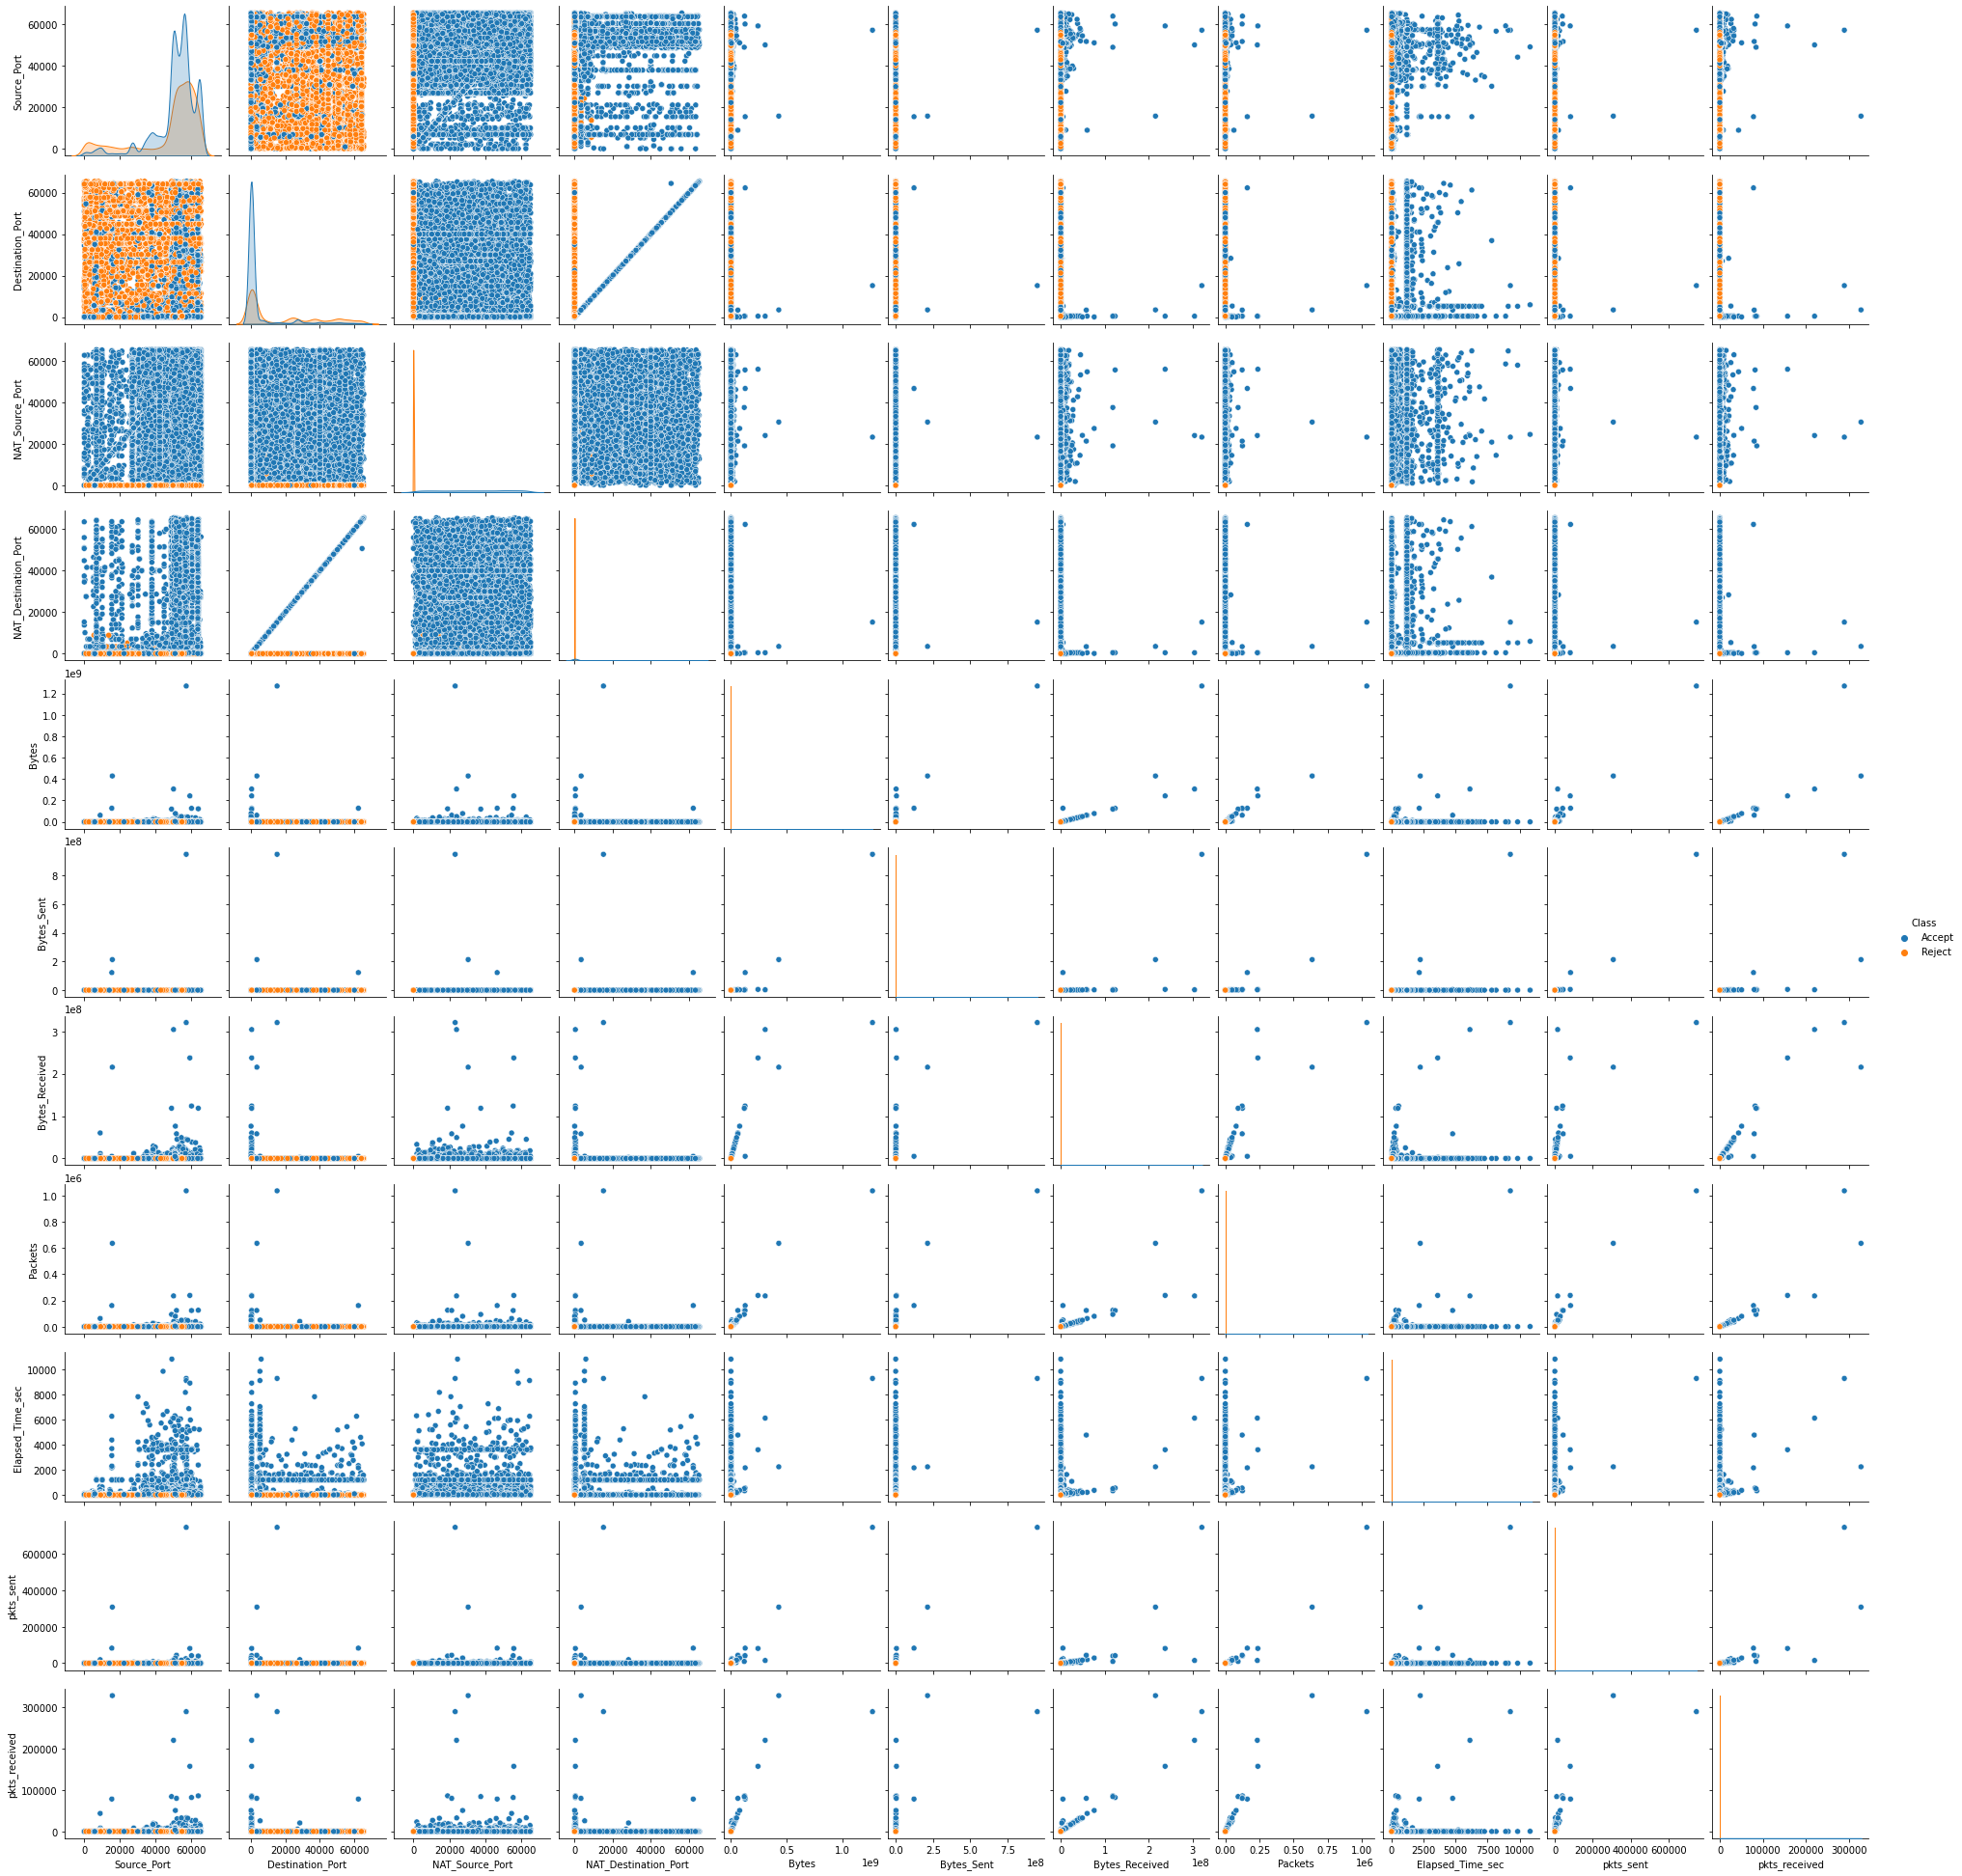

In [ ]:
sns.pairplot(df, hue='Class');

In [ ]:
df.cov()

,Source_Port,Destination_Port,NAT_Source_Port,NAT_Destination_Port,Bytes,Bytes_Sent,Bytes_Received,Packets,Elapsed_Time_sec,pkts_sent,pkts_received
Source_Port,2.327368e+08,-9.359784e+07,4.873192e+07,-3.691046e+06,1.894110e+07,-5.434974e+07,7.329084e+07,-1.363902e+05,-2.146349e+05,-6.985119e+04,-6.653903e+04
Destination_Port,-9.359784e+07,3.409942e+08,-1.142791e+08,7.374341e+07,-5.495309e+08,1.183997e+08,-6.679306e+08,-5.747090e+05,1.314624e+05,-1.268227e+05,-4.478863e+05
NAT_Source_Port,4.873192e+07,-1.142791e+08,4.827112e+08,3.818090e+07,1.315715e+09,1.886038e+08,1.127111e+09,1.424741e+06,9.402118e+05,5.077584e+05,9.169828e+05
NAT_Destination_Port,-3.691046e+06,7.374341e+07,3.818090e+07,9.485128e+07,2.175320e+08,2.946886e+08,-7.715657e+07,2.302044e+05,6.473986e+05,1.923697e+05,3.783473e+04
Bytes,1.894110e+07,-5.495309e+08,1.315715e+09,2.175320e+08,3.156686e+13,2.007705e+13,1.148980e+13,2.810058e+10,2.529224e+08,1.748006e+10,1.062052e+10
Bytes_Sent,-5.434974e+07,1.183997e+08,1.886038e+08,2.946886e+08,2.007705e+13,1.465465e+13,5.422409e+12,1.744113e+10,1.459363e+08,1.200161e+10,5.439510e+09
Bytes_Received,7.329084e+07,-6.679306e+08,1.127111e+09,-7.715657e+07,1.148980e+13,5.422409e+12,6.067392e+12,1.065945e+10,1.069861e+08,5.478443e+09,5.181008e+09
Packets,-1.363902e+05,-5.747090e+05,1.424741e+06,2.302044e+05,2.810058e+10,1.744113e+10,1.065945e+10,2.634771e+07,2.283374e+05,1.588282e+07,1.046489e+07
Elapsed_Time_sec,-2.146349e+05,1.314624e+05,9.402118e+05,6.473986e+05,2.529224e+08,1.459363e+08,1.069861e+08,2.283374e+05,9.148312e+04,1.315324e+05,9.680497e+04
pkts_sent,-6.985119e+04,-1.268227e+05,5.077584e+05,1.923697e+05,1.748006e+10,1.200161e+10,5.478443e+09,1.588282e+07,1.315324e+05,1.036113e+07,5.521687e+06


In [ ]:
df.corr().round(5)

,Source_Port,Destination_Port,NAT_Source_Port,NAT_Destination_Port,Bytes,Bytes_Sent,Bytes_Received,Packets,Elapsed_Time_sec,pkts_sent,pkts_received
Source_Port,1.00000,-0.33225,0.14539,-0.02484,0.00022,-0.00093,0.00195,-0.00174,-0.04652,-0.00142,-0.00196
Destination_Port,-0.33225,1.00000,-0.28168,0.41004,-0.00530,0.00167,-0.01468,-0.00606,0.02354,-0.00213,-0.01091
NAT_Source_Port,0.14539,-0.28168,1.00000,0.17844,0.01066,0.00224,0.02083,0.01263,0.14149,0.00718,0.01877
NAT_Destination_Port,-0.02484,0.41004,0.17844,1.00000,0.00398,0.00790,-0.00322,0.00460,0.21978,0.00614,0.00175
Bytes,0.00022,-0.00530,0.01066,0.00398,1.00000,0.93346,0.83023,0.97438,0.14883,0.96655,0.85021
Bytes_Sent,-0.00093,0.00167,0.00224,0.00790,0.93346,1.00000,0.57505,0.88760,0.12604,0.97398,0.63910
Bytes_Received,0.00195,-0.01468,0.02083,-0.00322,0.83023,0.57505,1.00000,0.84307,0.14360,0.69096,0.94604
Packets,-0.00174,-0.00606,0.01263,0.00460,0.97438,0.88760,0.84307,1.00000,0.14707,0.96129,0.91698
Elapsed_Time_sec,-0.04652,0.02354,0.14149,0.21978,0.14883,0.12604,0.14360,0.14707,1.00000,0.13510,0.14395
pkts_sent,-0.00142,-0.00213,0.00718,0.00614,0.96655,0.97398,0.69096,0.96129,0.13510,1.00000,0.77155


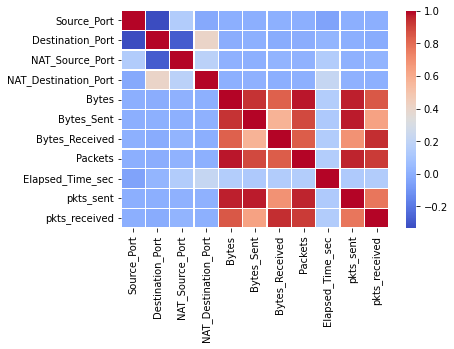

In [ ]:
sns.heatmap(df.corr(), annot=False, linewidth = 0.30, cmap ='coolwarm')
plt.show()

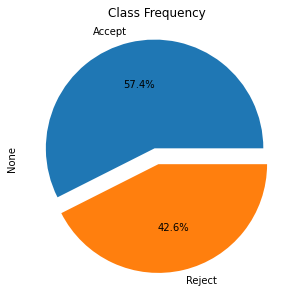

In [ ]:
#visualising the class feature
plt.figure(figsize=(10,5))
df.groupby("Class").size().plot.pie(autopct='%0.1f%%',
explode=(0.1,0.05),title="Class Frequency")
plt.show()

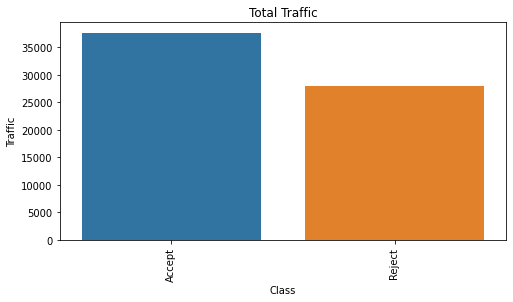

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='Class')
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)
plt.title('Total Traffic')
plt.ylabel('Traffic');

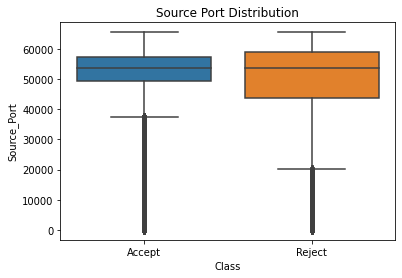

In [ ]:
bp = sns.boxplot(x=df['Class'], y=df['Source_Port'])
bp.set_title('Source Port Distribution');

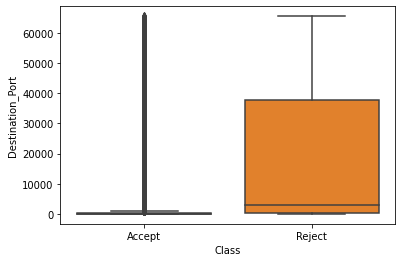

In [ ]:
sns.boxplot(x=df['Class'], y=df['Destination_Port'])
bp.set_title('Destination Port Distribution');

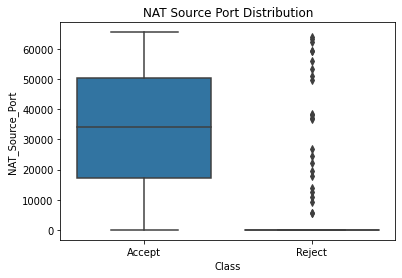

In [ ]:
bp = sns.boxplot(x=df['Class'], y=df['NAT_Source_Port'])
bp.set_title('NAT Source Port Distribution');

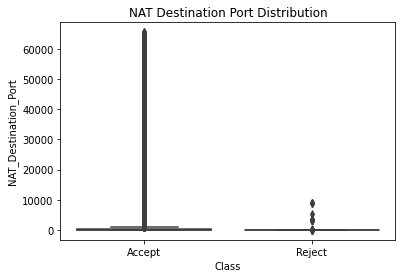

In [ ]:
bp = sns.boxplot(x=df['Class'], y=df['NAT_Destination_Port'])
bp.set_title('NAT Destination Port Distribution');

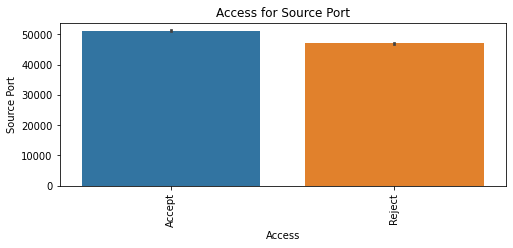

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(data=df, x='Class', y = 'Source_Port')
plt.xticks(rotation=90)
plt.title('Access for Source Port')
plt.xlabel('Access')
plt.ylabel('Source Port');

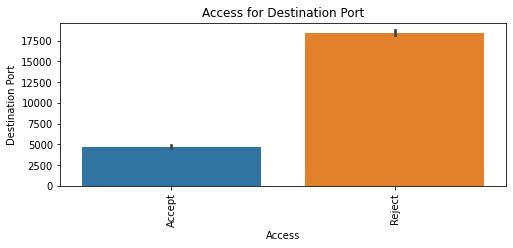

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(data=df, x='Class', y = 'Destination_Port')
plt.xticks(rotation=90)
plt.title('Access for Destination Port')
plt.xlabel('Access')
plt.ylabel('Destination Port');

In [ ]:
#Investigating the ports, by categorising them, to get the top 10 ports
ports_cat = ['Source_Port', 'Destination_Port', 'NAT_Source_Port', 'NAT_Destination_Port']

port: Source_Port
58638    840
27005    513
443      273
57470    222
49418    210
6881     177
0        173
50584    116
3478     105
26900    102
Name: Source_Port, dtype: int64



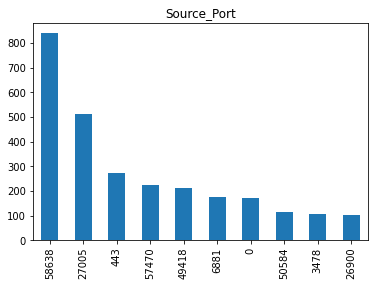

port: Destination_Port
53       15414
445      12891
443      11684
80        4035
25174     1087
5900       909
37965      826
22114      767
64147      756
50584      717
Name: Destination_Port, dtype: int64



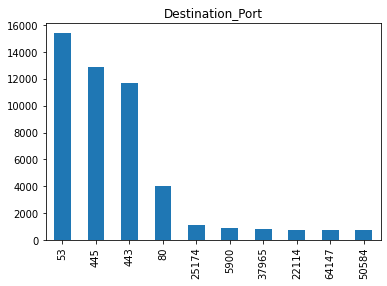

port: NAT_Source_Port
0        28432
48817       83
58638       51
50116       15
7986         5
30399        5
43757        5
57880        5
57596        5
60868        5
Name: NAT_Source_Port, dtype: int64



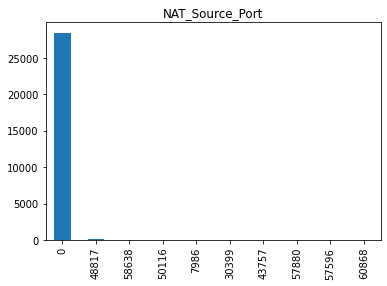

port: NAT_Destination_Port
0        28432
53       15094
443      11678
80        4028
27015      234
27017      160
123        156
3389       156
6881       143
5228       100
Name: NAT_Destination_Port, dtype: int64



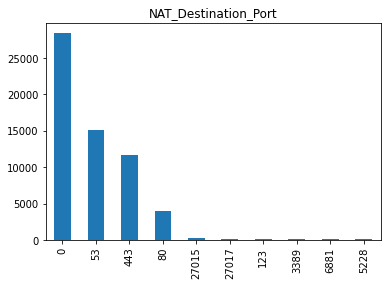

In [ ]:
for f in ports_cat:
    print('port:', f)
    print(df[f].value_counts()[0:10])
    print()
    df[f].value_counts()[0:10].plot(kind='bar')
    plt.title(f)
    plt.show()

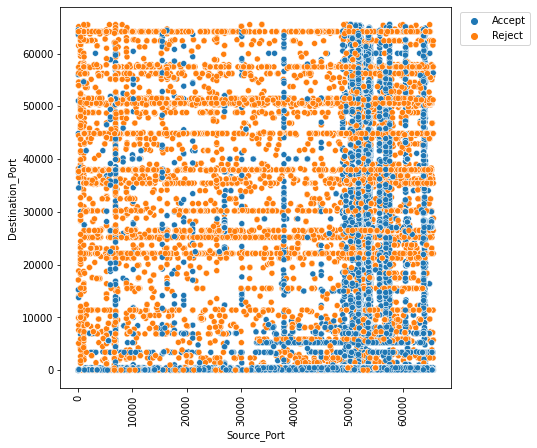

In [ ]:
#distribution of the top 10 destination port traffic
var = "Destination_Port"
data = pd.concat([df["Source_Port"],df[var]], axis=1)
plt.figure(figsize=(7,7))
sns.scatterplot(x="Source_Port",y="Destination_Port", data=df, hue = "Class")
locs, labels=plt.xticks()
plt.setp(labels,rotation=90)
plt.legend(bbox_to_anchor=(1.01,1));

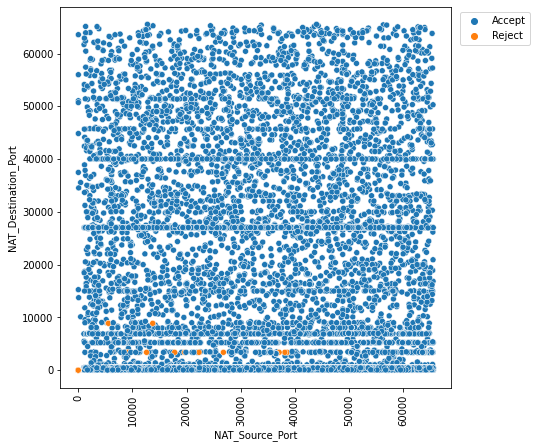

In [ ]:
#distribution of the top 10 source port traffic
var = "NAT_Destination_Port"
data = pd.concat([df["NAT_Source_Port"],df[var]], axis=1)
plt.figure(figsize=(7,7))
sns.scatterplot(x="NAT_Source_Port",y="NAT_Destination_Port", data=df, hue = "Class")
locs, labels=plt.xticks()
plt.setp(labels,rotation=90)
plt.legend(bbox_to_anchor=(1.01,1));

In [ ]:
#transforming class variable to numeric for modelling
df["class"]=df["Class"].astype("category").cat.codes

In [ ]:
#df.head()

In [ ]:
df=df.drop(['Class'], axis = 1)

In [ ]:
#seperating the dataset into X and y data
X = df.values
y = df['class'].values

In [ ]:
#delete the survived column from X
X = np.delete(X,-1,axis=-1)

In [ ]:
X

array([[57222,    53, 54587, ...,    30,     1,     1],
       [56258,  3389, 56258, ...,    17,    10,     9],
       [ 6881, 50321, 43265, ...,  1199,     1,     1],
       ...,
       [54871,   445,     0, ...,     0,     1,     0],
       [54870,   445,     0, ...,     0,     1,     0],
       [54867,   445,     0, ...,     0,     1,     0]])

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int8)

In [ ]:
#split the dataset into 80% training and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
print(X_train)

[[64715    53 13561 ...    30     1     1]
 [46774 64147     0 ...     0     1     0]
 [56543   443 22323 ...   120     9     9]
 ...
 [53681 31466 64750 ...     8     2     0]
 [56835 35894     0 ...     0     1     0]
 [50426   445     0 ...     0     1     0]]


In [ ]:
print(X_test)

[[56782    53 33216 ...    33     1     1]
 [60989   445     0 ...     0     1     0]
 [49242   443 58883 ...   203     2     8]
 ...
 [56646   443 10246 ...    26     6     4]
 [63586 46824     0 ...     0     1     0]
 [49499   443 13640 ...   483    55    86]]


In [ ]:
#Random forest classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
rfc = RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state = 0)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.9997711146715496

In [ ]:
y_pred_rfc=rfc.predict(X_test)
print(y_pred_rfc)

[0 1 0 ... 0 1 0]


In [ ]:
rfc.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=209652396),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=398764591),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=924231285),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=441365315),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1537364731),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=192771779),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1491434855),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
           

[Text(0.595, 0.9285714285714286, 'X[3] <= 0.5\nentropy = 0.985\nsamples = 33232\nvalue = [29942, 22483]'),
 Text(0.41, 0.7857142857142857, 'X[10] <= 0.5\nentropy = 0.14\nsamples = 14438\nvalue = [453, 22465]'),
 Text(0.37, 0.6428571428571429, 'X[1] <= 60.0\nentropy = 0.066\nsamples = 14266\nvalue = [178, 22465]'),
 Text(0.26, 0.5, 'X[1] <= 45.0\nentropy = 0.712\nsamples = 429\nvalue = [134, 552]'),
 Text(0.16, 0.35714285714285715, 'X[9] <= 1.5\nentropy = 0.343\nsamples = 350\nvalue = [36, 527]'),
 Text(0.08, 0.21428571428571427, 'X[8] <= 45.0\nentropy = 0.021\nsamples = 313\nvalue = [1, 503]'),
 Text(0.04, 0.07142857142857142, 'entropy = 0.0\nsamples = 312\nvalue = [0, 503]'),
 Text(0.12, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.24, 0.21428571428571427, 'X[5] <= 200.0\nentropy = 0.975\nsamples = 37\nvalue = [35, 24]'),
 Text(0.2, 0.07142857142857142, 'entropy = 0.771\nsamples = 16\nvalue = [7, 24]'),
 Text(0.28, 0.07142857142857142, 'entropy = 0.0\nsa

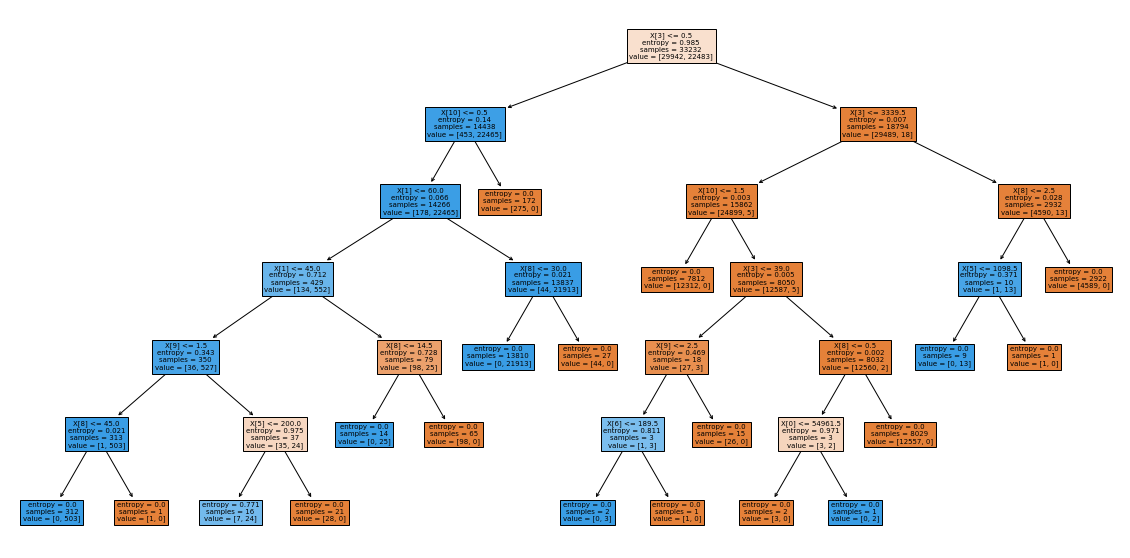

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(rfc.estimators_[99],filled=True)

In [ ]:
#confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_rfc)
print(cm)
accuracy_score(y_test, y_pred_rfc)

[[7519    3]
 [   0 5585]]


0.9997711146715496

In [ ]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix

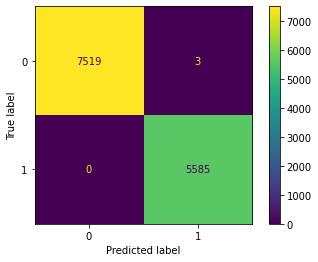

In [ ]:
plot_confusion_matrix(rfc,X_test,y_test)
plt.show();

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7522
           1       1.00      1.00      1.00      5585

    accuracy                           1.00     13107
   macro avg       1.00      1.00      1.00     13107
weighted avg       1.00      1.00      1.00     13107



In [ ]:
#Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test,y_test)

0.9535362783245594

In [ ]:
y_pred_nb=nb.predict(X_test)
print(y_pred_nb)

[0 1 0 ... 0 1 0]


In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)
accuracy_score(y_test, y_pred_nb)

[[6918  604]
 [   5 5580]]


0.9535362783245594

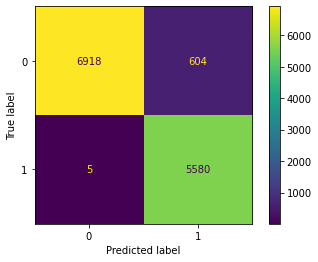

In [ ]:
plot_confusion_matrix(nb,X_test,y_test)
plt.show();

In [ ]:
#prediction probabilities
r_probs = [0 for _ in range(len(y_test))]
rfc_probs = rfc.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

In [ ]:
#probabilities for the positive outcome is kept
rfc_probs = rfc_probs[:,1]
nb_probs = nb_probs[:,1]

In [ ]:
#compute the AUROC values
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(y_test, r_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

In [ ]:
#display the AUROC scores
print("Random Prediction: AUROC = %.4f" %(r_auc))
print("Random Forest: AUROC = %.4f" %(rfc_auc))
print("Naive Bayes: AUROC = %.4f" %(nb_auc))

Random Prediction: AUROC = 0.5000
Random Forest: AUROC = 1.0000
Naive Bayes: AUROC = 0.9777


In [ ]:
#calculate the ROC curve
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

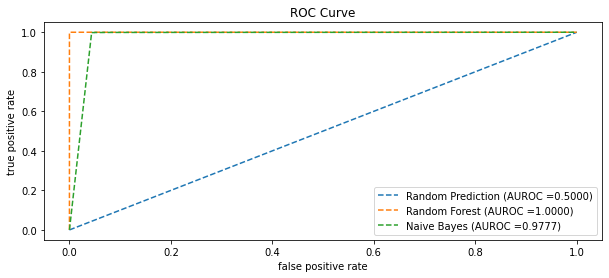

In [ ]:
#plot the ROC Curve
plt.figure(figsize=(10,4))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random Prediction (AUROC =%0.4f)' %r_auc)
plt.plot(rfc_fpr, rfc_tpr, linestyle='--', label='Random Forest (AUROC =%0.4f)' %rfc_auc)
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes (AUROC =%0.4f)' %nb_auc)
plt.title('ROC Curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show();

In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      7522
           1       0.90      1.00      0.95      5585

    accuracy                           0.95     13107
   macro avg       0.95      0.96      0.95     13107
weighted avg       0.96      0.95      0.95     13107

